# Nonuniform sensitivity

## Background

Not all pixels in a camera have the same sensitivity to light: there are intrinsic differences from pixel-to-pixel. Vignetting, a dimming near the corners of an image caused by the optical system to which the camera is attached, and dust on optical elements such as filters, the glass window covering the CCD, and the CCD chip itself can also block some light.

Vingetting and dust can reduce the amount of light reaching the CCD chip while pixel-to-pixel sensitivity variations affects the counts read from the chip.

The code to produce the simulated sensitivty map (aka flat image) is long enough that is not included in this notebook. We load it instead from [image_sim.py](image_sim.py).

In [1]:
import numpy as np

from convenience_functions import show_image
from image_sim import *

## A sample flat image

The sample flat image below has the same size as the simulated image in the previous notebook. 

In [2]:
image = np.zeros([2000, 2000])
flat = sensitivity_variations(image)

(10.0, 10)


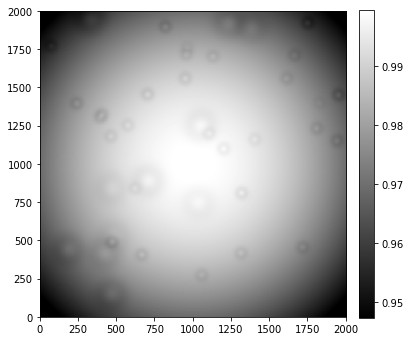

In [3]:
show_image(flat, cmap='gray')

The "donuts" in the image are dust on elements like filters in the optical path. Note that the size of the variations is small, a few percent at most. 

## Effect of nonuniform sensitivity on images

Recall that an image read off a CCD, ignoring variations in sensitivity, can be thought of as a combination of several pieces:

$$
\text{image} = \text{bias} + \text{noise} + \text{dark current} + \text{sky} + \text{stars}
$$

The effect of sensitivity variations is to reduce the amount of *light* reaching the sensor. In the equation above, that means that the flat multiplies just the sky and stars portion of the input:

$$
\text{image} = \text{bias} + \text{noise} + \text{dark current} + \text{flat} \times (\text{sky} + \text{stars})
$$


## A realistic image

In the cell below we construct the last image from the previous notebook. Recall that there we used a read noise of 5 electrons/pixel, dark current of 0.1 electron/pix/sec, bias level of 1100, and sky background of 20 counts.

In [4]:
gain = 1.0
exposure = 30.0
dark = 0.1
sky_counts = 20
bias_level = 1100
read_noise_electrons = 5
max_star_counts = 2000
bias_only = bias(image, bias_level, realistic=True)
noise_only = read_noise(image, read_noise_electrons, gain=gain)
dark_only = dark_current(image, dark, exposure, gain=gain, hot_pixels=True)
sky_only = sky_background(image, sky_counts, gain=gain)
stars_only = stars(image, 50, max_counts=max_star_counts)

/Users/mcraig/Documents/Research/ccd-reduction-photometry/notebooks/image_sim.py:121: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dark_im[[hot_y, hot_x]] = hot_current * exposure_time / gain


The individual pieces of the image are assembled below; it is the inclusion of the flat that makes this the closest of the simulated images to a realistic images.

In [5]:
final_image = bias_only + noise_only + dark_only + flat * (sky_only + stars_only)

(10.0, 10)


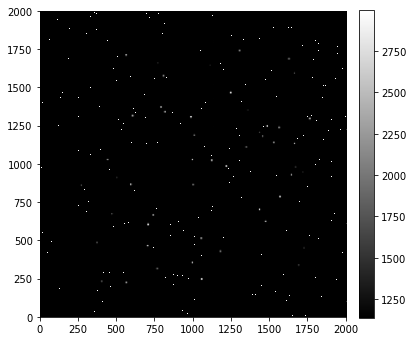

In [6]:
show_image(final_image, cmap='gray', percu=99.9)

Visually, this does not look any different than the final image in the previous notebook; the effects of sensitivity variations are typically not evident in raw images unless the sky background is large. 

You can see the effect by artificially increasing the sky background.

(10.0, 10)


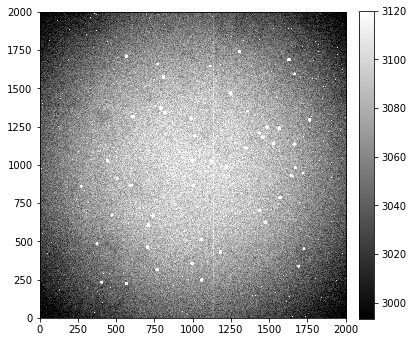

In [7]:
final_image2 = bias_only + noise_only + dark_only + flat * (sky_background(image, 100 * sky_counts, gain=gain) + stars_only)
show_image(final_image2, cmap='gray')